## importing libraries

In [ ]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from sklearn import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [ ]:
dataset= datasets.load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
x=dataset.data
y=dataset.target
x_tensor=torch.tensor(x,dtype=torch.float32)
y_tensor=torch.tensor(y,dtype=torch.long).reshape(-1,1)

In [ ]:
print(x_tensor.shape)
print(y_tensor.shape)

torch.Size([150, 4])
torch.Size([150, 1])


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_tensor,y_tensor,test_size=0.2,random_state=42)

In [ ]:
train_dataset=torch.utils.data.TensorDataset(x_train,y_train)
test_dataset=torch.utils.data.TensorDataset(x_test,y_test)

In [ ]:
train_dataloader=DataLoader(train_dataset,batch_size=10,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=10,shuffle=True)

## lets build the neural network

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(NeuralNetwork,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.fc1=nn.Linear(self.input_size,self.hidden_size)
        self.fc2=nn.Linear(self.hidden_size,self.output_size)
        self.relu=nn.ReLU()

    def forward(self,x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.fc2(out)
        return out





In [ ]:
model=NeuralNetwork(4,10,3)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)


In [ ]:
epochs=100
for i in range(epochs):
    for x,y in train_dataloader:
        optimizer.zero_grad()
        output=model.forward(x)
        loss=criterion(output,y.flatten())
        loss.backward()
        optimizer.step()
    print(f"epoch:{i+1},loss:{loss.item()}")

epoch:1,loss:1.26605224609375
epoch:2,loss:0.826928436756134
epoch:3,loss:1.0261826515197754
epoch:4,loss:0.965894341468811
epoch:5,loss:1.0228389501571655
epoch:6,loss:1.0386954545974731
epoch:7,loss:0.8454675674438477
epoch:8,loss:0.854212760925293
epoch:9,loss:0.6971083879470825
epoch:10,loss:0.6293137669563293
epoch:11,loss:0.654321551322937
epoch:12,loss:0.7368487119674683
epoch:13,loss:0.6774781942367554
epoch:14,loss:0.686235785484314
epoch:15,loss:0.5552676320075989
epoch:16,loss:0.6011191606521606
epoch:17,loss:0.7641696929931641
epoch:18,loss:0.5016418695449829
epoch:19,loss:0.5982299447059631
epoch:20,loss:0.6280084848403931
epoch:21,loss:0.5487491488456726
epoch:22,loss:0.39705365896224976
epoch:23,loss:0.5131523013114929
epoch:24,loss:0.48134881258010864
epoch:25,loss:0.5109881162643433
epoch:26,loss:0.6049707531929016
epoch:27,loss:0.48152726888656616
epoch:28,loss:0.6021783947944641
epoch:29,loss:0.49332308769226074
epoch:30,loss:0.6351650357246399
epoch:31,loss:0.411375

In [ ]:
torch.save(model,"iris_model.pth")

In [ ]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.4624, -0.3008,  0.2764,  0.9762],
        [ 0.3687, -0.5403, -0.2267, -0.0228],
        [ 0.3787, -0.4812,  0.6290,  0.9274],
        [-0.1622,  0.8961, -0.1303, -0.7365],
        [ 0.4216, -0.4179, -0.3041,  0.0474],
        [-0.4400,  0.1900, -0.4820,  0.4012],
        [ 0.1079, -0.4908, -0.4801,  0.3006],
        [ 0.4637,  0.6386, -0.6514, -0.8181],
        [-0.4206, -0.1295, -0.1646, -0.4842],
        [ 0.4597,  0.2181, -0.5248, -0.3296]], requires_grad=True)
Parameter containing:
tensor([ 0.3051, -0.0548,  0.0167,  0.8637,  0.3292,  0.4515, -0.3330,  0.5218,
        -0.1184,  0.0948], requires_grad=True)
Parameter containing:
tensor([[-0.1923,  0.2315, -0.4367,  1.0049, -0.0137,  0.2976, -0.1891,  0.7475,
         -0.2905,  0.8395],
        [ 0.3372,  0.0660,  0.2775,  0.2501,  0.5377, -0.3067, -0.0270, -0.0497,
         -0.2414,  0.4853],
        [ 0.4608,  0.1215,  0.6309, -1.1074, -0.3601, -0.3133, -0.0865, -0.9379,
         -0.1605, -1.0707]]

In [ ]:
actual=[]
prediction=[]
for x,y in test_dataloader:
    output=model.forward(x)
    _,predicted=torch.max(output,1)
    actual.extend(y.flatten().tolist())
    prediction.extend(predicted.flatten().tolist())


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

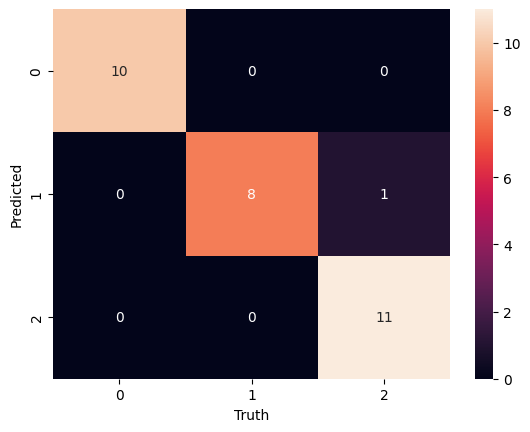

In [ ]:
cm=confusion_matrix(actual,prediction)
sns.heatmap(cm,annot=True)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.show()